# TASK #1: UNDERSTAND THE PROBLEM STATEMENT/GOAL



- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

# TASK #2: IMPORT DATASET AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [2]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [3]:
# Let's explore the 3 dataframes
# "stores" dataframe contains information related to the 45 stores such as type and size of store.

stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [5]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


# TASK #3: EXPLORE INDIVIDUAL DATASET

MINI CHALLENGE
- Use info and describe to individually explore the 3 dataframes
- What is the maximum fuel price? and maximum unemployment numbers?
- What is the average size of the stores?


In [12]:
# Change the datatype of 'date' column

feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [13]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-12-03,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-02-04,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-09-04,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [14]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


# TASK #4: MERGE DATASET INTO ONE DATAFRAME

In [15]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [16]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])


In [18]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
5,1,6,2010-05-02,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
6,1,7,2010-05-02,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
7,1,8,2010-05-02,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
8,1,9,2010-05-02,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9,1,10,2010-05-02,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [20]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')


In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [23]:
x = '2010-05-02'
str(x).split('-')

['2010', '05', '02']

MINI CHALLENGE
- Define a function to extract the month information from the dataframe column "Date"
- Apply the function to the entire column "Date" in the merged dataframe "df" and write the output in a column entitled "month"


# TASK #5: EXPLORE MERGED DATASET

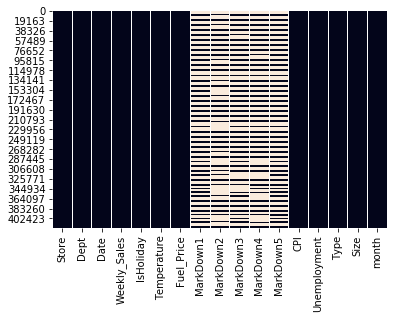

In [27]:
sns.heatmap(df.isnull(), cbar = False)

In [28]:
# check the number of non-null values in the dataframe
df.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [29]:
# Fill up NaN elements with zeros
df = df.fillna(0)


In [30]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
5,1,6,2010-05-02,5749.03,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
6,1,7,2010-05-02,21084.08,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
7,1,8,2010-05-02,40129.01,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
8,1,9,2010-05-02,16930.99,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5
9,1,10,2010-05-02,30721.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,5


In [31]:
# Statistical summary of the combined dataframe
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.478580
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.324757
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000


In [32]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()


0

In [33]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

MINI CHALLENGE
- Replace the "IsHoliday" with ones and zeros instead of True and False (characters with numbers)


# TASK #6: PERFORM EXPLORATORY DATA ANALYSIS

In [36]:
# Create pivot tables to understand the relationship in the data

result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= np.mean)

In [37]:
result

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
                 6      2876.19       NaN NaN
                 7     16481.79       NaN NaN
                 8     34658.25       NaN NaN
                 9     44977.91       NaN NaN
                 10    29764.24       NaN NaN
                 11    16227.08       NaN NaN
                 12     9759.85       NaN NaN
                 13    40474.22       NaN NaN
                 14    12943.86       NaN NaN
                 16    16248.15       NaN NaN
                 17     8648.02       NaN NaN
                 18     3389.42       NaN NaN
                 19     1583.20       NaN NaN
                 20     3859.87       NaN NaN
                 21     7880.07       NaN NaN
                 22     8353.58       NaN NaN
                 23    18377.92       NaN NaN
                 24     5430.09       NaN NaN
                 25     8643.04       NaN NaN
                 26     8255.99       NaN NaN
                 27     1042.30       NaN NaN
                 28      741.36       NaN NaN
                 29     3425.58       NaN NaN
                 30     3257.42       NaN NaN
                 31     1915.08       NaN NaN
...                         ...       ...  ..
2012-12-10 45    40         NaN  39569.52 NaN
                 41         NaN   1977.74 NaN
                 42         NaN   4656.99 NaN
                 44         NaN   2868.70 NaN
                 46         NaN  11171.55 NaN
                 52         NaN    829.62 NaN
                 55         NaN   3888.44 NaN
                 56         NaN   1673.01 NaN
                 58         NaN    565.00 NaN
                 59         NaN    211.32 NaN
                 60         NaN    171.00 NaN
                 67         NaN   5573.26 NaN
                 71         NaN   2576.48 NaN
                 72         NaN  29042.15 NaN
                 74         NaN   9338.55 NaN
                 79         NaN  14059.61 NaN
                 80         NaN    762.58 NaN
                 81         NaN  14805.25 NaN
                 82         NaN  12558.39 NaN
                 83         NaN    748.58 NaN
                 85         NaN   1357.16 NaN
                 87         NaN   7918.21 NaN
                 90         NaN  23653.95 NaN
                 91         NaN  17566.28 NaN
                 92         NaN  52360.65 NaN
                 93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [38]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [39]:

result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})

In [40]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-01-10 1     1         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 2         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 3         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 4         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 5         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 6         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 7         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 8         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 9         0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 10        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 11        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 12        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 13        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 14        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 16        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 17        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 18        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 19        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 20        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 21        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 22        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 23        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 24        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 25        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 26        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 27        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 28        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 29        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 30        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
                 31        0.00 NaN       0.0 NaN      0.00 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    40     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 41     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 42     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 44     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 46     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 52     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 55     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 56     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 58     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 59     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 60     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 67     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 71     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 72     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 74     1956.28 NaN       0.0 NaN      7.89 NaN    599.32 NaN   
                 79     1956.28 NaN       0.0 NaN    

In [41]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [42]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday.

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [43]:
corr_matrix = df.drop(columns = ['Store']).corr()

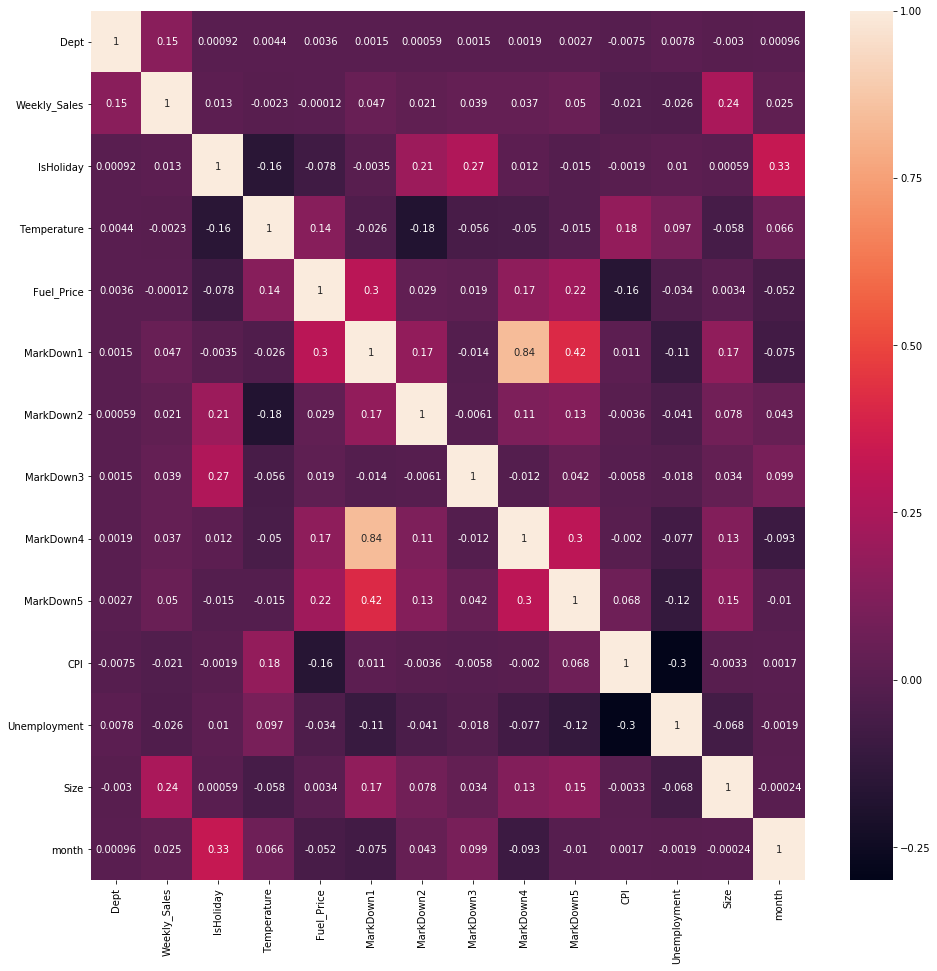

In [44]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #7: PERFORM DATA VISUALIZATION

In [ ]:
df

In [ ]:
df.hist(bins = 30, figsize = (20,20), color = 'r')


In [ ]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

In [ ]:
df_type = df.groupby('Type').mean()

In [ ]:
df_type

In [ ]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [ ]:
# df_dept = df.drop(columns = ['Store','Type','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Size','month'])
df_dept = df.groupby('Dept').mean()
df_dept

In [ ]:
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color = 'r', width = 0.9)

In [ ]:
fig = plt.figure(figsize = (14,16))
df_dept['MarkDown1'].plot(kind = 'barh', color = 'blue', width = 0.9)

In [ ]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown2'].plot(kind = 'barh', color = 'yellow', width = 0.9)

In [ ]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown3'].plot(kind = 'barh', color = 'black', width = 0.9)

In [ ]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown4'].plot(kind = 'barh', color = 'orange', width = 0.9)

In [ ]:
fig = plt.figure(figsize = (14,16))

df_dept['MarkDown5'].plot(kind = 'barh', color = 'brown', width = 0.9)

- We can conclude that departments that have poor weekly sales have been assigned high number of markdowns. Let's explore this in more details
- Example: check out store 77 and 99 

In [ ]:
# Sort by weekly sales
df_dept_sale = df_dept.sort_values(by = ['Weekly_Sales'], ascending = True)
df_dept_sale['Weekly_Sales'][:30]

# TASK #8: PREPARE THE DATA BEFORE TRAINING

In [45]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])


In [46]:
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [47]:
df_final.shape

(421570, 138)

In [48]:
df_target.shape

(421570,)

In [49]:
df_final

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
3,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
6,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
7,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
8,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
9,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [51]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [52]:
# scaling the data before feeding the model
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler_x = StandardScaler()
# X = scaler_x.fit_transform(X)

# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

In [53]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [54]:
X_train

array([[ 0.   , 70.37 ,  3.511, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 81.14 ,  2.642, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 73.38 ,  4.151, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 87.83 ,  3.533, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 63.39 ,  3.734, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 23.29 ,  3.439, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

# TASK #9: TRAIN XGBOOST REGRESSOR IN LOCAL MODE

In [ ]:
!pip install xgboost

In [ ]:
# Train an XGBoost regressor model 

import xgboost as xgb


model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

In [ ]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

In [ ]:
# make predictions on the test data

y_predict = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

MINI CHALLENGE
- Retrain the model with less 'max_depth'
- Comment on the results

# TASK #10: TRAIN XGBOOST USING SAGEMAKER

In [55]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [56]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,36381.410156,0.0,70.370003,3.511,0.00000,0.0,0.00,0.000000,0.000000,194.509216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6981.839844,0.0,81.139999,2.642,0.00000,0.0,0.00,0.000000,0.000000,211.664291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.639999,0.0,73.379997,4.151,0.00000,0.0,0.00,0.000000,0.000000,128.999863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1294.160034,0.0,76.669998,3.812,0.00000,0.0,0.00,0.000000,0.000000,140.085983,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.379997,0.0,78.160004,3.717,740.77002,0.0,32.02,123.040001,1617.030029,221.260117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [58]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,1052.339966,0.0,56.009998,3.332,0.0,0.0,0.0,0.0,0.0,217.485367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3579.239990,0.0,79.779999,2.932,0.0,0.0,0.0,0.0,0.0,136.455399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11056.959961,0.0,57.779999,2.764,0.0,0.0,0.0,0.0,0.0,136.627731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.110000,0.0,64.080002,2.830,0.0,0.0,0.0,0.0,0.0,132.435745,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6434.899902,0.0,73.080002,2.854,0.0,0.0,0.0,0.0,0.0,209.998459,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
val_data.shape

(31618, 139)

In [60]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [73]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'sagemaker-practical-3'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [74]:
print(role)

arn:aws:iam::126821927778:role/service-role/AmazonSageMaker-ExecutionRole-20200522T021072


In [75]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-3/XGBoost-Regressor/train/XGBoost-Regressor


In [76]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-practical-3/XGBoost-Regressor/validation/XGBoost-Regressor


In [77]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-practical-3/XGBoost-Regressor/output


In [78]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [79]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



In [80]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

2020-05-22 06:26:33 Starting - Starting the training job...
2020-05-22 06:26:36 Starting - Launching requested ML instances.........
2020-05-22 06:28:19 Starting - Preparing the instances for training...
2020-05-22 06:29:02 Downloading - Downloading input data...
2020-05-22 06:29:21 Training - Downloading the training image...
2020-05-22 06:29:35 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[06:29:38] 358334x138 matrix with 49450092 entries loaded from /opt/m

# TASK #11: DEPLOY THE MODEL TO MAKE PREDICTIONS

In [107]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

Using already existing model: sagemaker-xgboost-2020-05-22-06-26-33-657


-------------!

In [115]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [116]:
X_test.shape

(31618, 138)

In [133]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [148]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])

In [149]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])

In [150]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])

In [168]:
predictions4

b'8053.92333984375,10770.8349609375,18444.505859375,14141.2626953125,9982.10546875,16430.626953125,10077.66015625,14671.126953125,57667.046875,16265.1669921875,1111.8319091796875,15881.599609375,19305.171875,894.5372924804688,25852.537109375,15513.5830078125,42600.0625,3977.57275390625,18945.375,37622.8515625,3621.60791015625,8983.3056640625,5886.18603515625,29638.369140625,13366.59765625,6665.9765625,-599.9642944335938,6417.43505859375,10703.6416015625,10386.5888671875,12418.314453125,1783.1900634765625,4702.8564453125,13633.9599609375,42624.11328125,24691.986328125,15539.7578125,63072.20703125,-415.2270202636719,17068.015625,70679.9140625,3464.456298828125,51580.125,15370.1083984375,24449.568359375,9007.9013671875,14043.5986328125,14215.91015625,10037.5205078125,16570.728515625,6406.908203125,21744.53515625,20979.646484375,17650.66796875,43568.93359375,1798.8253173828125,26485.5390625,14176.560546875,7622.212890625,8716.4658203125,18771.216796875,13127.8486328125,17176.8515625,50620.

In [151]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [152]:
predicted_values_1 = bytes_2_array(predictions1)

In [153]:
predicted_values_1.shape

(10000, 1)

In [154]:
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [155]:
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [156]:
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [163]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [165]:
predicted_values.shape

(31618, 1)

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7141.338 
MSE = 50998708.0 
MAE = 4271.1924 
R2 = 0.8986535169832639 
Adjusted R2 = 0.8982092266736509


In [167]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# TASK #12: PERFORM HYPERPARAMETERS OPTIMIZATION

See Slides for detailed steps

# TASK #13: TRAIN THE MODEL WITH BEST PARAMETERS

In [190]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune the hyper-parameters to improve the performance of the model
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


In [191]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

2020-05-22 07:36:14 Starting - Starting the training job...
2020-05-22 07:36:16 Starting - Launching requested ML instances.........
2020-05-22 07:38:00 Starting - Preparing the instances for training......
2020-05-22 07:38:55 Downloading - Downloading input data......
2020-05-22 07:40:05 Training - Downloading the training image...
2020-05-22 07:40:25 Training - Training image download completed. Training in progress.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[07:40:30] 358334x138 matrix with 49450092 entries loaded from /

In [192]:
# Deploying the model to perform inference

Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

---------------!

In [194]:
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [ ]:
# Try to make inference with the entire testing dataset (Crashes!)
predictions = Xgboost_regressor.predict(X_test)
predicted_values = bytes_2_array(predictions)

In [196]:
predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [197]:
predicted_values_1 = bytes_2_array(predictions1)
predicted_values_1.shape

(10000, 1)

In [198]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [199]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [200]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [201]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [202]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4266.012 
MSE = 18198860.0 
MAE = 1811.6404 
R2 = 0.9638345632190437 
Adjusted R2 = 0.9636760184661681


In [203]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# EXCELLENT JOB! 

# MINI CHALLENGE SOLUTIONS

In [ ]:
feature.info()
feature.describe()
sales.info()
sales.describe()
stores.info()
stores.describe()

In [ ]:
def get_month(x):
    return int(str(x).split('-')[1])

df['month'] = df['Date'].apply(get_month)

In [ ]:
df['IsHoliday'] = df['IsHoliday'].replace({True : 1, False : 0})